In [3]:
import numpy as np
import random
from Enums.GraphType import GraphType
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

graph_type = GraphType.Map
match graph_type:
    case GraphType.Random:
        node_number = 10
        min_weight = 1
        max_weight = 10

        #create random graph
        graph = RandomGraph(node_number=node_number,min_weight=min_weight,max_weight=max_weight)
    
    case GraphType.Map:
        cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
        start_city = "Boos"
        #create real graph
        graph = MapGraph(cities=cities,start_city=start_city)



Convergence atteinte après 30 itérations.
Best path: ['Boos', 'Rieux', 'Yermenonville', 'Bouffry', 'Mondoubleau', 'Valennes', 'Le Mans', 'Arquenay', 'Sucé-sur-Erdre', 'Nantes', 'Rezé', 'La Rochelle', 'Bordeaux', 'Bergerac', 'Toulouse', 'Montpellier', 'Marseille', 'Lyon', 'Vic-sur-Cère', 'Clermont-Ferrand', 'Riom', 'Boos']
Total distance: 2364.208583182701


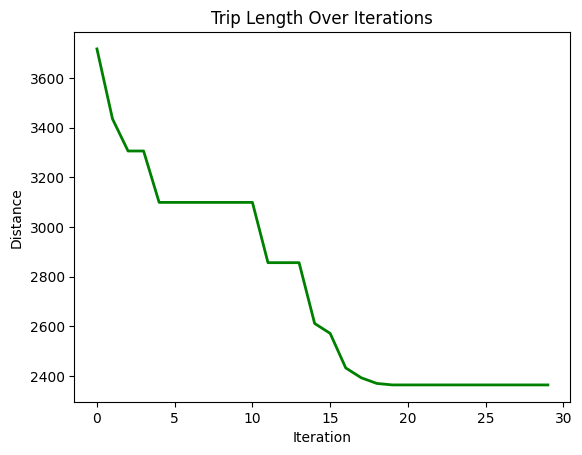

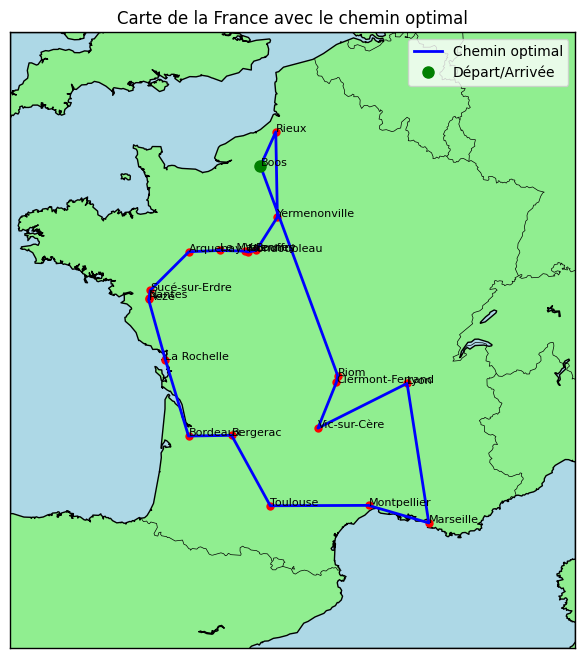

In [4]:
from Enums.AlgorithmType import AlgorithmType
from Algorithms.ACO.AcoAlgo import AcoAlgo

algorithm_type = AlgorithmType.ACO
match algorithm_type:
    case AlgorithmType.ACO:
        num_ants = 100
        max_iterations = 100
        convergence_threshold = 10
        decay = 0.7
        alpha = 0.5

        algorithm = AcoAlgo(graph, num_ants, decay, alpha, max_iterations, convergence_threshold)

best_path, best_distance = algorithm.run()  # Run the ACO algorithm to find the best path

# Print the best path found and the total distance
print(f"Best path: {best_path}")
print(f"Total distance: {best_distance}")
algorithm.plot_distance_over_iterations()
graph.plot_graph(best_path)

#reset all datas
del algorithm
del best_path
del best_distance